In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('/content/StudentsPerformance+(1).csv')

In [4]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


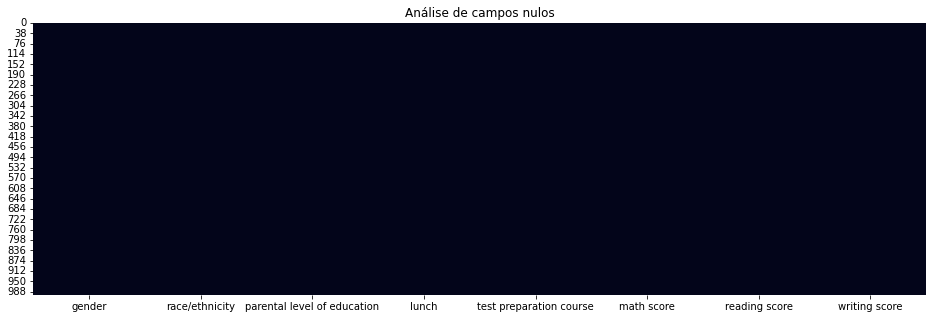

In [4]:
#campos NULOS

nulos = dataset.isnull()

plt.figure(figsize = (16, 5))
plt.title('Análise de campos nulos')

sns.heatmap(nulos, cbar =  False)

In [5]:
nulos.sum() #não temos campos nulos

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
#campos UNICOS

dataset.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
#campos DUPLICADOS

dataset.duplicated().sum()

0

In [9]:
#Estatística básica

dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
#percentual de homens e mulheres na base

dataset['gender'].value_counts(normalize = True) * 100

female    51.8
male      48.2
Name: gender, dtype: float64

In [11]:
#percentual dos grupos que fizeram a prova

dataset['race/ethnicity'].value_counts(normalize = True) * 100

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

In [12]:
#percentual de pessoas que fizeram o teste prepaatório

dataset['test preparation course'].value_counts(normalize = True) * 100

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

Notas/ gênero

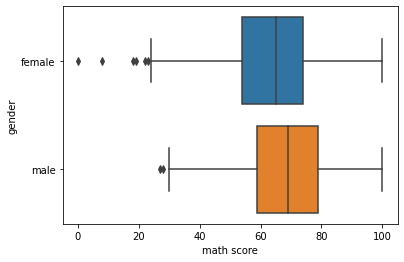

In [13]:
sns.boxplot(data = dataset, x = 'math score', y = 'gender')

#as mulheres tem uma média de nota um pouco inferior a dos homens em matemática, e notas mais baixas tbm (outliers)

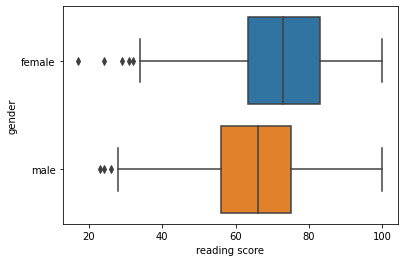

In [14]:
sns.boxplot(data = dataset, x = 'reading score', y = 'gender')

#os homens apresentam uma média de nota menor que a das mulheres na prova de leitura

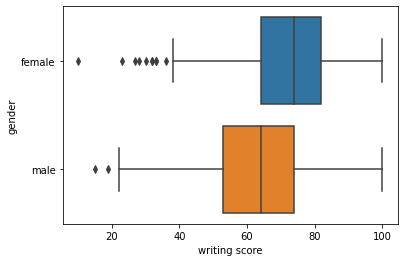

In [15]:
sns.boxplot(data = dataset, x = 'writing score', y = 'gender')

#os homens apresentaram uma média menor que a das mulhere e uma nota mínima tbm bem inferior 

In [18]:
dataset.groupby('gender').describe()['math score']

#olhando os dados para entender talvez o pq a média das mulheres foi menor
#uma diferença é que elas tiveram uma nota zerada, equanto o mínimo dos homens foi 27

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


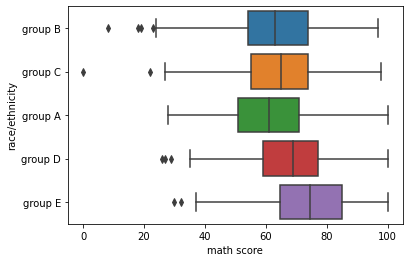

In [19]:
sns.boxplot(data = dataset, x = 'math score', y ='race/ethnicity' )

#o grupo E se destacou diante dos outros grupos

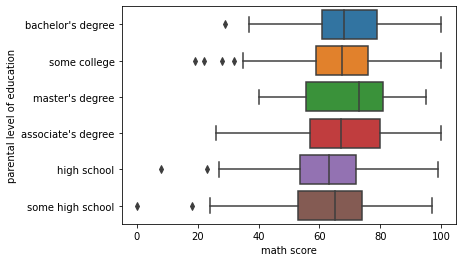

In [20]:
sns.boxplot(data = dataset, x = 'math score', y ='parental level of education' )

#quem tem um nível de ensino maior acaba se destacando na média

In [22]:
dataset.groupby(by = ['parental level of education']).describe()['math score']


,count,mean,std,min,25%,50%,75%,max
parental level of education,,,,,,,,
associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


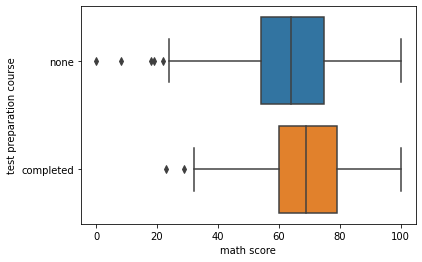

In [5]:
sns.boxplot(data = dataset, x = 'math score', y ='test preparation course') 

In [6]:
dataset.groupby(by = ['test preparation course']).describe()['math score']

#quem se preparou obteve uma média maior de note do que quem não se preparou
#inclusive teve gente que não se preparou e zerou na prova

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0
